<a href="https://colab.research.google.com/github/Hrotich/WEEK8-IP/blob/main/WEEK_8_IP%2C_HARON_KIPKOECH_ROTICH%2C_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Defining the Question


### a) Specifying the Data Analytic Question







### b) Defining the Metric for Success

### c) Understanding the context 



### e) Data Relevance

## 2. Reading the Data

> Indented block



In [1]:
# to import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

train = pd.read_csv("/content/train (5).csv")



## 3. Checking the Data

In [ ]:
# to previews top of  train set
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# check for data types

train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# checking for info for train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


DATA CLEANING

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


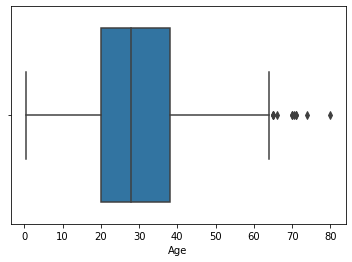

In [ ]:
# Outlier detection
sns.boxplot(train['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


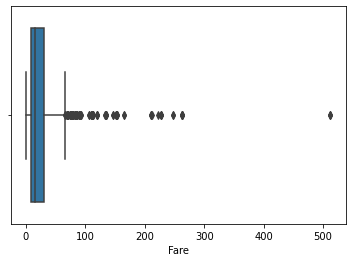

In [ ]:
# bolot for  fare
sns.boxplot(train['Fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


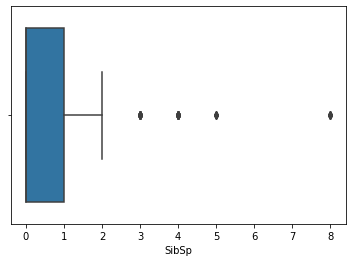

In [ ]:
# boxplot for SibSp
sns.boxplot(train['SibSp'])

In [ ]:
# droping columns 
train.drop(['Name','Ticket','PassengerId'], axis = 1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [ ]:
# checking for missing values
train.isnull().sum()
# we have null values in age and cabin columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# dealing with null values in train set
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Cabin'] = train['Cabin'].fillna(train['Cabin'].mode()[0])
# imputed the null values in AGE with mean of the age column because its distribution assumes gauassian form
# imputed null values in the Cabin col. with mode

In [ ]:
# to Label encode AGE AND  cabin
from sklearn.preprocessing import LabelEncoder


In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
#Assigning numerical values and storing in another column
train['Sex'] = labelencoder.fit_transform(train['Sex'])


In [ ]:
# to encode cabin column
train['Cabin'] = labelencoder.fit_transform(train['Cabin'])
# encoding the  embarked column
train['Embarked'] = labelencoder.fit_transform(train['Embarked'])


In [ ]:
#to drop name column
train.drop(['Name','Ticket','PassengerId','Fare'], axis = 1,inplace=True)


In [ ]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,1,22.000000,1,0,47,2
1,1,1,0,38.000000,1,0,81,0
2,1,3,0,26.000000,0,0,47,2
3,1,1,0,35.000000,1,0,55,2
4,0,3,1,35.000000,0,0,47,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,47,2
887,1,1,0,19.000000,0,0,30,2
888,0,3,0,29.699118,1,2,47,2
889,1,1,1,26.000000,0,0,60,0


EXPLORATORY DATA ANALYSIS

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

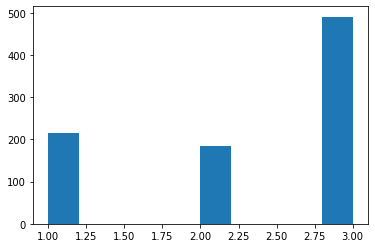

In [ ]:
# HISTOGRAM
plt.hist(train['Pclass'])

Majority of the population  are within age bracket of 20 - 30 years

(array([ 15.,  20.,  20., 709.,  21.,  21.,  22.,  17.,  20.,  26.]),
 array([  0. ,  14.6,  29.2,  43.8,  58.4,  73. ,  87.6, 102.2, 116.8,
        131.4, 146. ]),
 <a list of 10 Patch objects>)

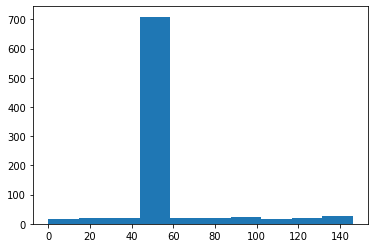

In [ ]:
# hitogram for cabin test set
plt.hist(train['Cabin'])
# the cabins around 15 to 22 are mostly populated

(array([ 15.,  20.,  20., 709.,  21.,  21.,  22.,  17.,  20.,  26.]),
 array([  0. ,  14.6,  29.2,  43.8,  58.4,  73. ,  87.6, 102.2, 116.8,
        131.4, 146. ]),
 <a list of 10 Patch objects>)

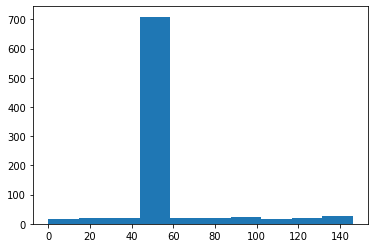

In [ ]:
#histogram for cabin test set
plt.hist(train['Cabin'])
# the cabins of 140 is are mostly populated

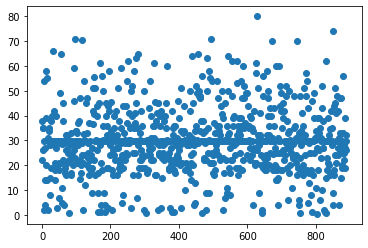

In [ ]:
# scatter plot for age
plt.scatter(train.index,train['Age'])
plt.show()

the age distribition of the population is concentrated around 30

In [ ]:
#Check for correlation
corr=train[['Pclass','Sex','Age','SibSp','Parch','Cabin','Embarked']].corr()
corr

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
Pclass,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.248495,0.157112
Sex,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.102643,0.104057
Age,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.056011,-0.022239
SibSp,0.083081,-0.114631,-0.232625,1.000000,0.414838,-0.005539,0.066654
Parch,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.022682,0.038322
Cabin,-0.248495,-0.102643,0.056011,-0.005539,0.022682,1.000000,0.019804
Embarked,0.157112,0.104057,-0.022239,0.066654,0.038322,0.019804,1.000000


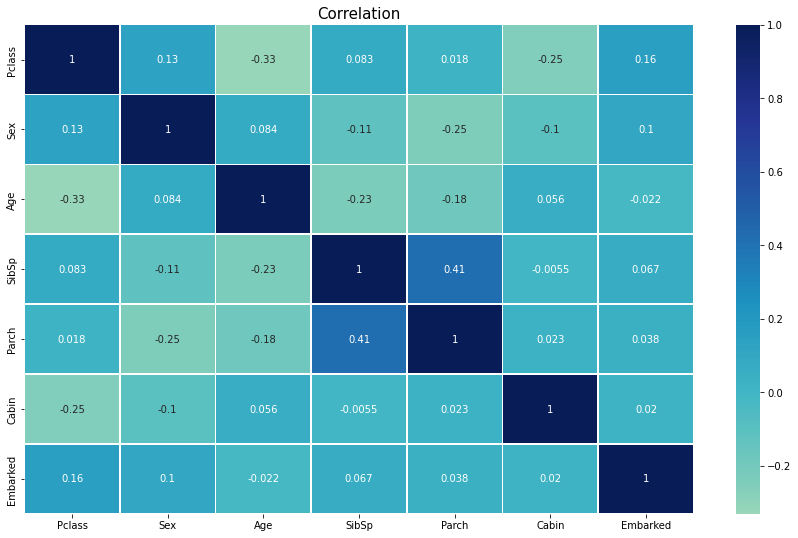

In [ ]:
 #Checking for correlation
# 
plt.figure(figsize = (15, 9))
sns.heatmap(corr, cmap="YlGnBu", annot = True, linewidths=.5,center = 0)
plt.title('Correlation', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Embarked vs Sex')

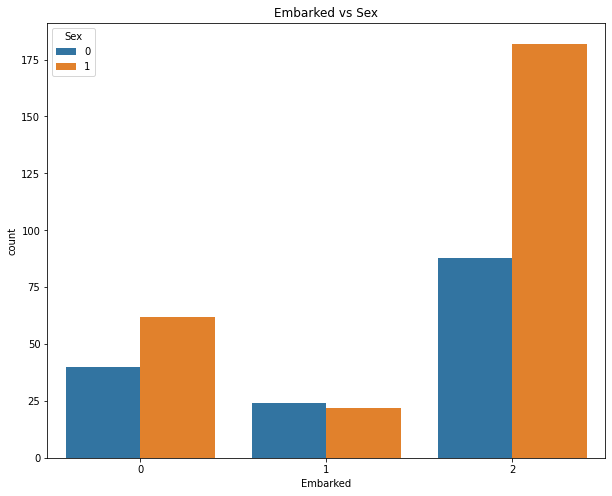

In [ ]:
#visualization for Embarked vs SEX
# 
ax = plt.subplots(figsize=(10,8))
sns.countplot(x='Embarked',hue ='Sex',data=test).set_title('Embarked vs Sex')

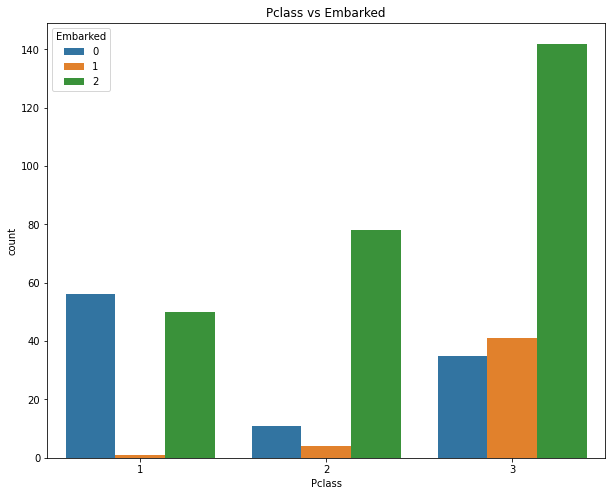

In [ ]:
# to visualize pclass vs Embarked

ax = plt.subplots(figsize=(10,8))
sns.countplot(x='Pclass',hue ='Embarked',data=test).set_title('Pclass vs Embarked');

KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
 #Splitting our dataset into its attributes and labels

X=train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin','Embarked']]
y=train['Survived']



In [ ]:
# splitting dataset to train and test
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# trainng and prediction
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# The final step is to make predictions on our test data

# 
y_pred = classifier.predict(X_test)

In [ ]:
# evaluation of model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[97 13]
 [22 47]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
# Training our knn regression algorithm
# 
clf = KNeighborsRegressor(11)
clf.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [ ]:
# Making our prediction
# 
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.13066161872662632


In [ ]:
# splitting dataset to train and test
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#training and prediction
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# prediction
y_pred = classifier.predict(X_test)
 
#evaluation of model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[141  27]
 [ 31  69]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       168
           1       0.72      0.69      0.70       100

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



In [ ]:
#Training our knn regression algorithm
# 
clf = KNeighborsRegressor(5)
clf.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
 #Making our prediction
# 
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.1508955223880597


In [ ]:
#lets adjust the testsize to 0.4
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.4, random_state=0)


In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
 #training and prediction
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# prediction
y_pred = classifier.predict(X_test)
 
#evaluation of model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[190  31]
 [ 43  93]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       221
           1       0.75      0.68      0.72       136

    accuracy                           0.79       357
   macro avg       0.78      0.77      0.78       357
weighted avg       0.79      0.79      0.79       357



In [ ]:
#Training our knn regression algorithm
# 
clf = KNeighborsRegressor(5)
clf.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
 #Making our prediction
#
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.14857142857142858


mean_squared_error for regressio increases with increases in test size  then on further increase of size the error decreases.

i.e when test size is 0.2  the MSE is0.13066161872662632

test size of 0.3 gives MSE of 0.1508955223880597

for test size of  0.4 the MSE IS 0.14857142857142858



OPtimization

In [ ]:
# 
 #Splitting our dataset into its attributes and labels

X=train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin','Embarked']]
y=train['Survived']


In [ ]:
# dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)


LinearDiscriminantAnalysis()

In [ ]:
# splitting dataset to train and test
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
 #trainng and prediction
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
 #The final step is to make predictions on our test data

y_pred = classifier.predict(X_test)

In [ ]:
#evaluation of model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[141  27]
 [ 31  69]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       168
           1       0.72      0.69      0.70       100

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



In [ ]:
# knn regression
#Training our knn regression algorithm
# 
clf = KNeighborsRegressor(5)
clf.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
#Making our prediction
#
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.1508955223880597


In [ ]:
# eulidean distance
from scipy import spatial
import numpy
from sklearn.metrics.pairwise import euclidean_distances

import math



In [ ]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin',
       'Embarked'],
      dtype='object')